In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../../dataset/zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
n_val = data.isnull().sum()
print("*"," Missing values entries ", "*", sep="*"*9)
print(n_val[n_val > 0])
print("*"," Missing values percentage ", "*", sep="*"*9)
print(n_val[n_val > 0]/data.shape[0])

********** Missing values entries **********
rate                            7775
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
dtype: int64
********** Missing values percentage **********
rate                           0.150337
phone                          0.023358
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
dtype: float64


In [8]:
loc = data["location"].value_counts()
print(loc)
order = data[ "online_order"].value_counts()
print(order)

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64
online_order
Yes    30444
No     21273
Name: count, dtype: int64


In [9]:
# # Koramangala is divided into different block, lets combine them all
# koramangala = ['Koramangala', 'Koramangala 1st Block', 'Koramangala 2nd Block', 'Koramangala 3rd Block', 'Koramangala 4th Block', 
# 'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block', 'Koramangala 8th Block']
# koramangala_dict = dict(neighborhood.loc[koramangala].sum())
# neighborhood = neighborhood.drop(koramangala)
# neighborhood.loc['Koramangala'] = koramangala_dict

# Number of Restaurants Per Location

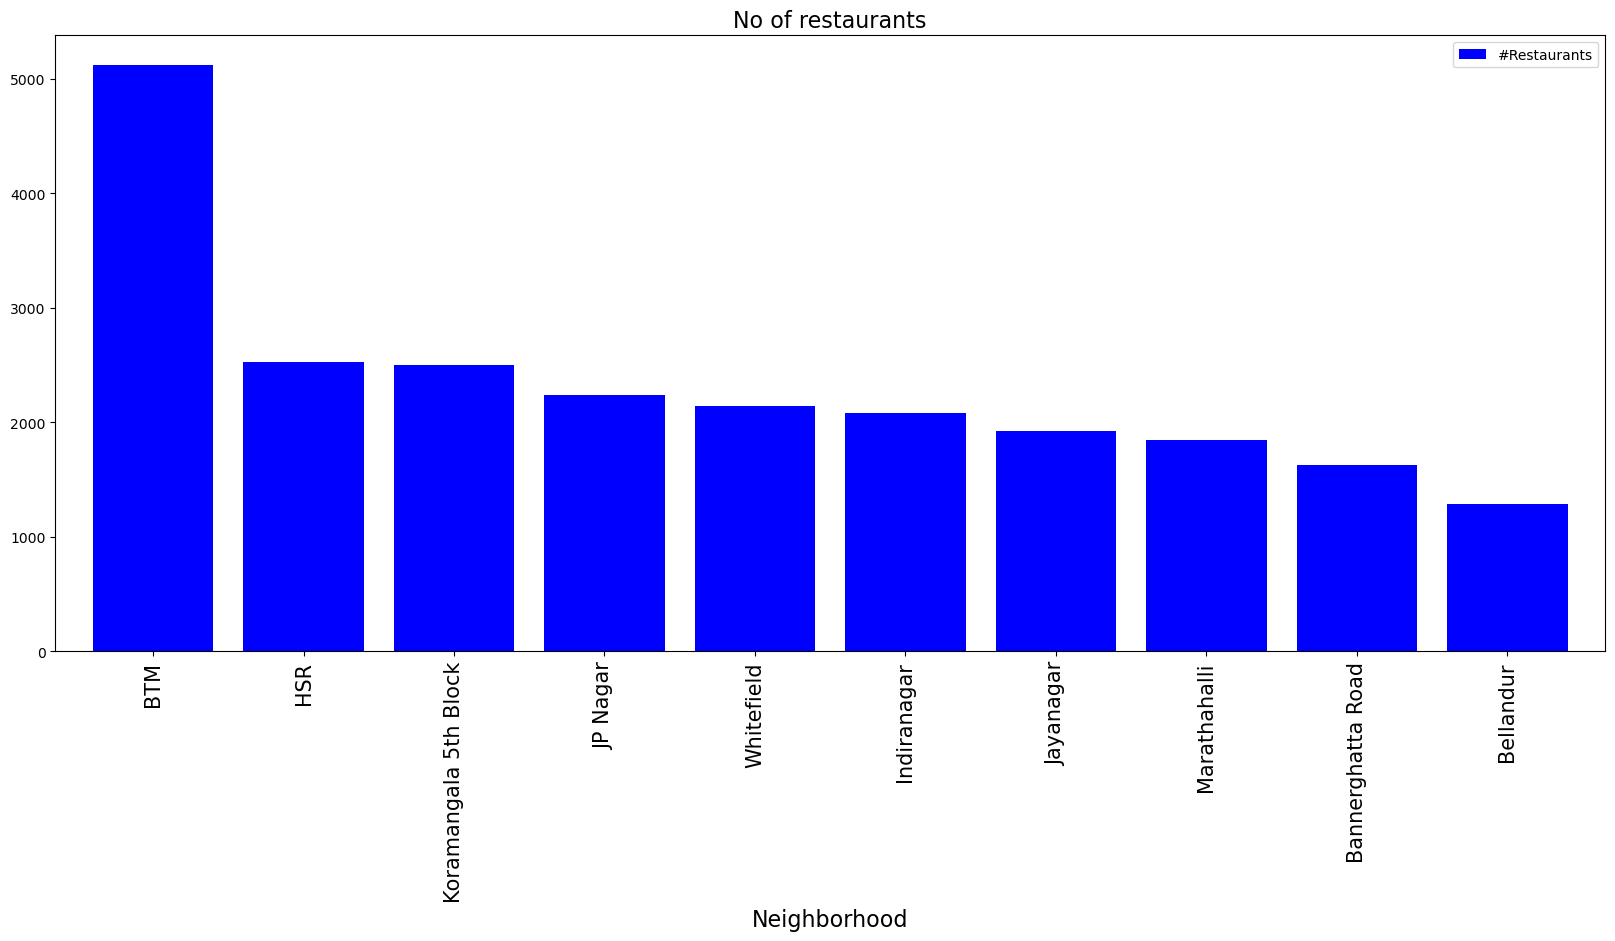

In [19]:
histo = data.groupby('location')['name'].count().sort_values(ascending=False)[:10]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
ax.xaxis.set_tick_params(labelsize=15)
ax.legend(fontsize=14)
ax.set_title('No of restaurants', fontsize=16)
ax.set_xlabel('Neighborhood', fontsize=16)
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

# Approximate Price of Food per Neighborhood

In [11]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(",","").astype(float)
data.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending= False)

location
Sankey Road         2505.555556
Race Course Road    1309.352518
Lavelle Road        1307.934990
MG Road             1155.704698
Infantry Road       1062.251656
                       ...     
Ejipura              320.506912
CV Raman Nagar       311.111111
Yelahanka            310.000000
City Market          302.368000
Peenya               300.000000
Name: approx_cost(for two people), Length: 93, dtype: float64

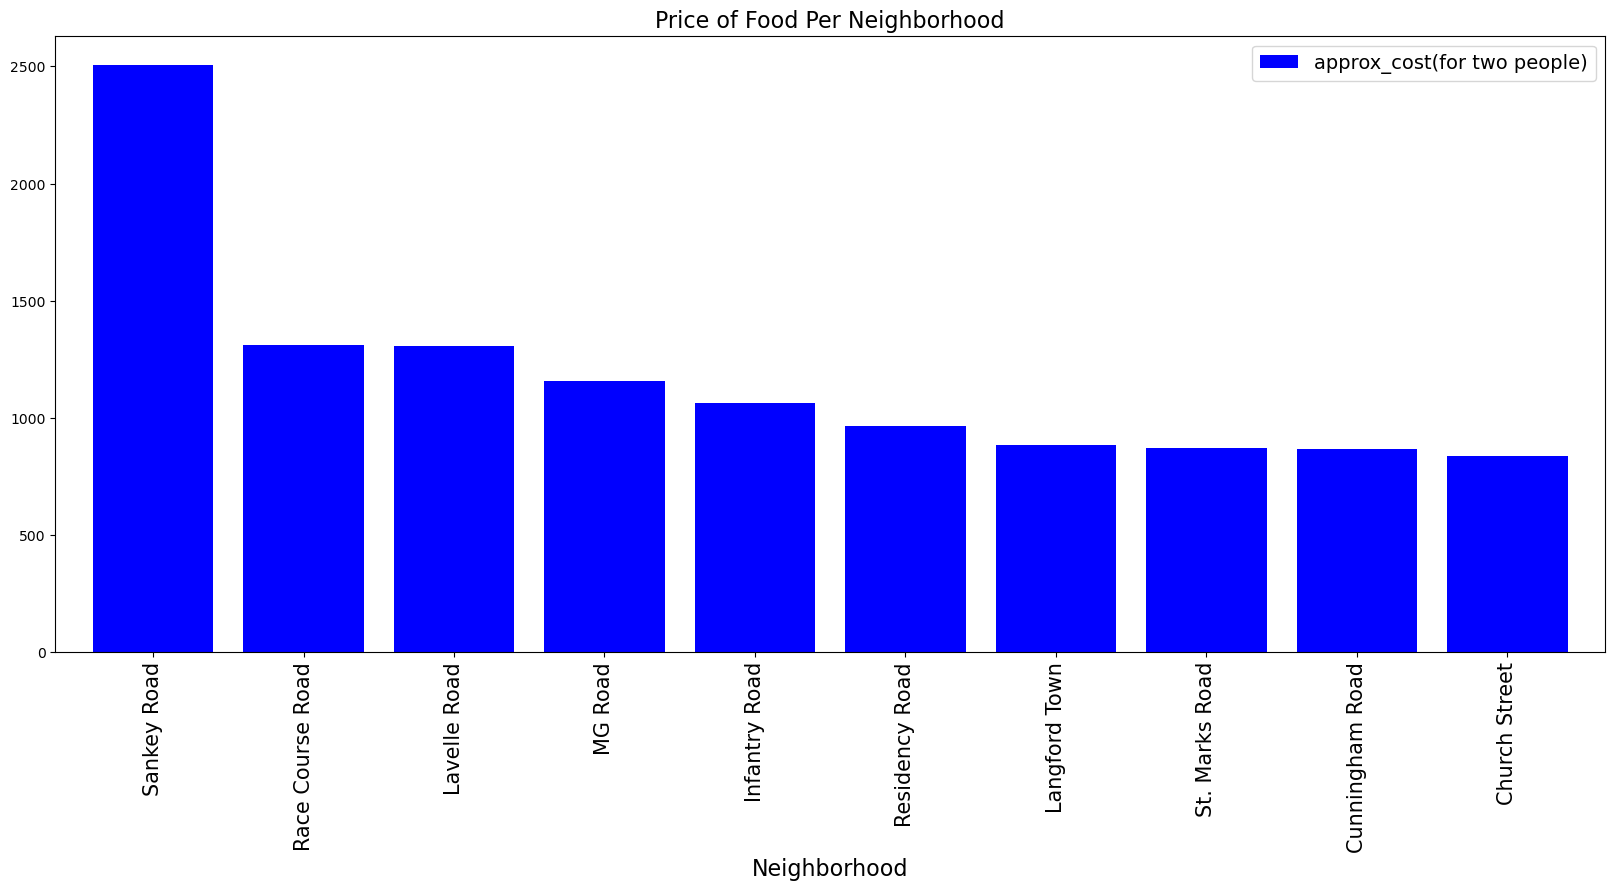

In [16]:
histo = data.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending= False)[:10]
ax = histo.plot(kind='bar', figsize=(20, 8), rot=90, width = 0.8, color=[ 'blue'])
rects = ax.patches
labels = list(histo)
ax.xaxis.set_tick_params(labelsize=15) 
ax.legend(fontsize=14) 
ax.set_title('Price of Food Per Neighborhood', fontsize=16)
ax.set_xlabel('Neighborhood', fontsize=16)
ax.set_facecolor("white") 

# Famous Neighborhood Kind of Food

In [13]:
types = set()
def func(x):
    if(type(x) == list):
        for y in x:
            types.add(y.strip())
cuisine = data['cuisines'].str.split(',').apply(func)

In [14]:
column_names = list(types)
# instantiate the dataframe
neighborhood_cns = pd.DataFrame(columns=column_names)
neighborhood_cns['neighborhood'] = data.groupby('location').groups.keys()
neighborhood_cns = neighborhood_cns.set_index('neighborhood').fillna(0)
i=0
for i in range(0,len(data)):
    for x in types:
        if type(data.loc[i, 'cuisines']) == str and x in data.loc[i, 'cuisines']:
            neighborhood_cns.loc[data.loc[i, 'location'], x] = neighborhood_cns.loc[data.loc[i, 'location'], x]+1



In [18]:
# koramangala_dict = dict(neighborhood_cns.loc[koramangala].sum())
# neighborhood_cns = neighborhood_cns.drop(koramangala)
# neighborhood_cns.loc['Koramangala'] = koramangala_dict


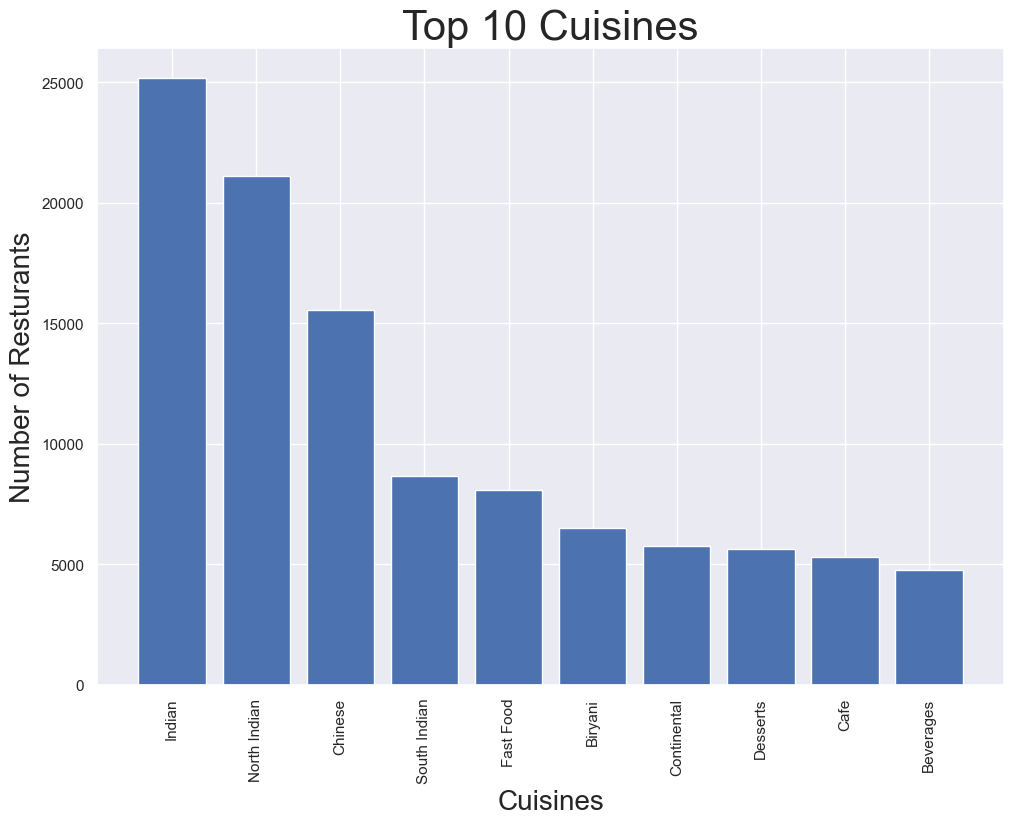

In [20]:
Cuisine_data = pd.DataFrame(neighborhood_cns.sum(axis=0))
Cuisine_data.reset_index(inplace=True)
Cuisine_data.columns = ['Cuisines', 'Number of Resturants']
Top15= (Cuisine_data.sort_values(['Number of Resturants'],ascending=False)).head(10)
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.bar(Top15['Cuisines'], Top15['Number of Resturants'])
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 10 Cuisines', fontsize=30)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
listed = data['listed_in(type)'].unique()
column_names = list(listed)
# instantiate the dataframe
neighborhood_lst = pd.DataFrame(columns=column_names)
neighborhood_lst['neighborhood'] = data.groupby('location').groups.keys()
neighborhood_lst = neighborhood_lst.set_index('neighborhood').fillna(0)
i=0
for i in range(0,len(data)):
    for x in listed:
        if type(data.loc[i, 'listed_in(type)']) == str and x in data.loc[i, 'listed_in(type)'] and type(data.loc[i, 'location']) == str:
            neighborhood_lst.loc[data.loc[i, 'location'], x] = neighborhood_lst.loc[data.loc[i, 'location'], x]+1

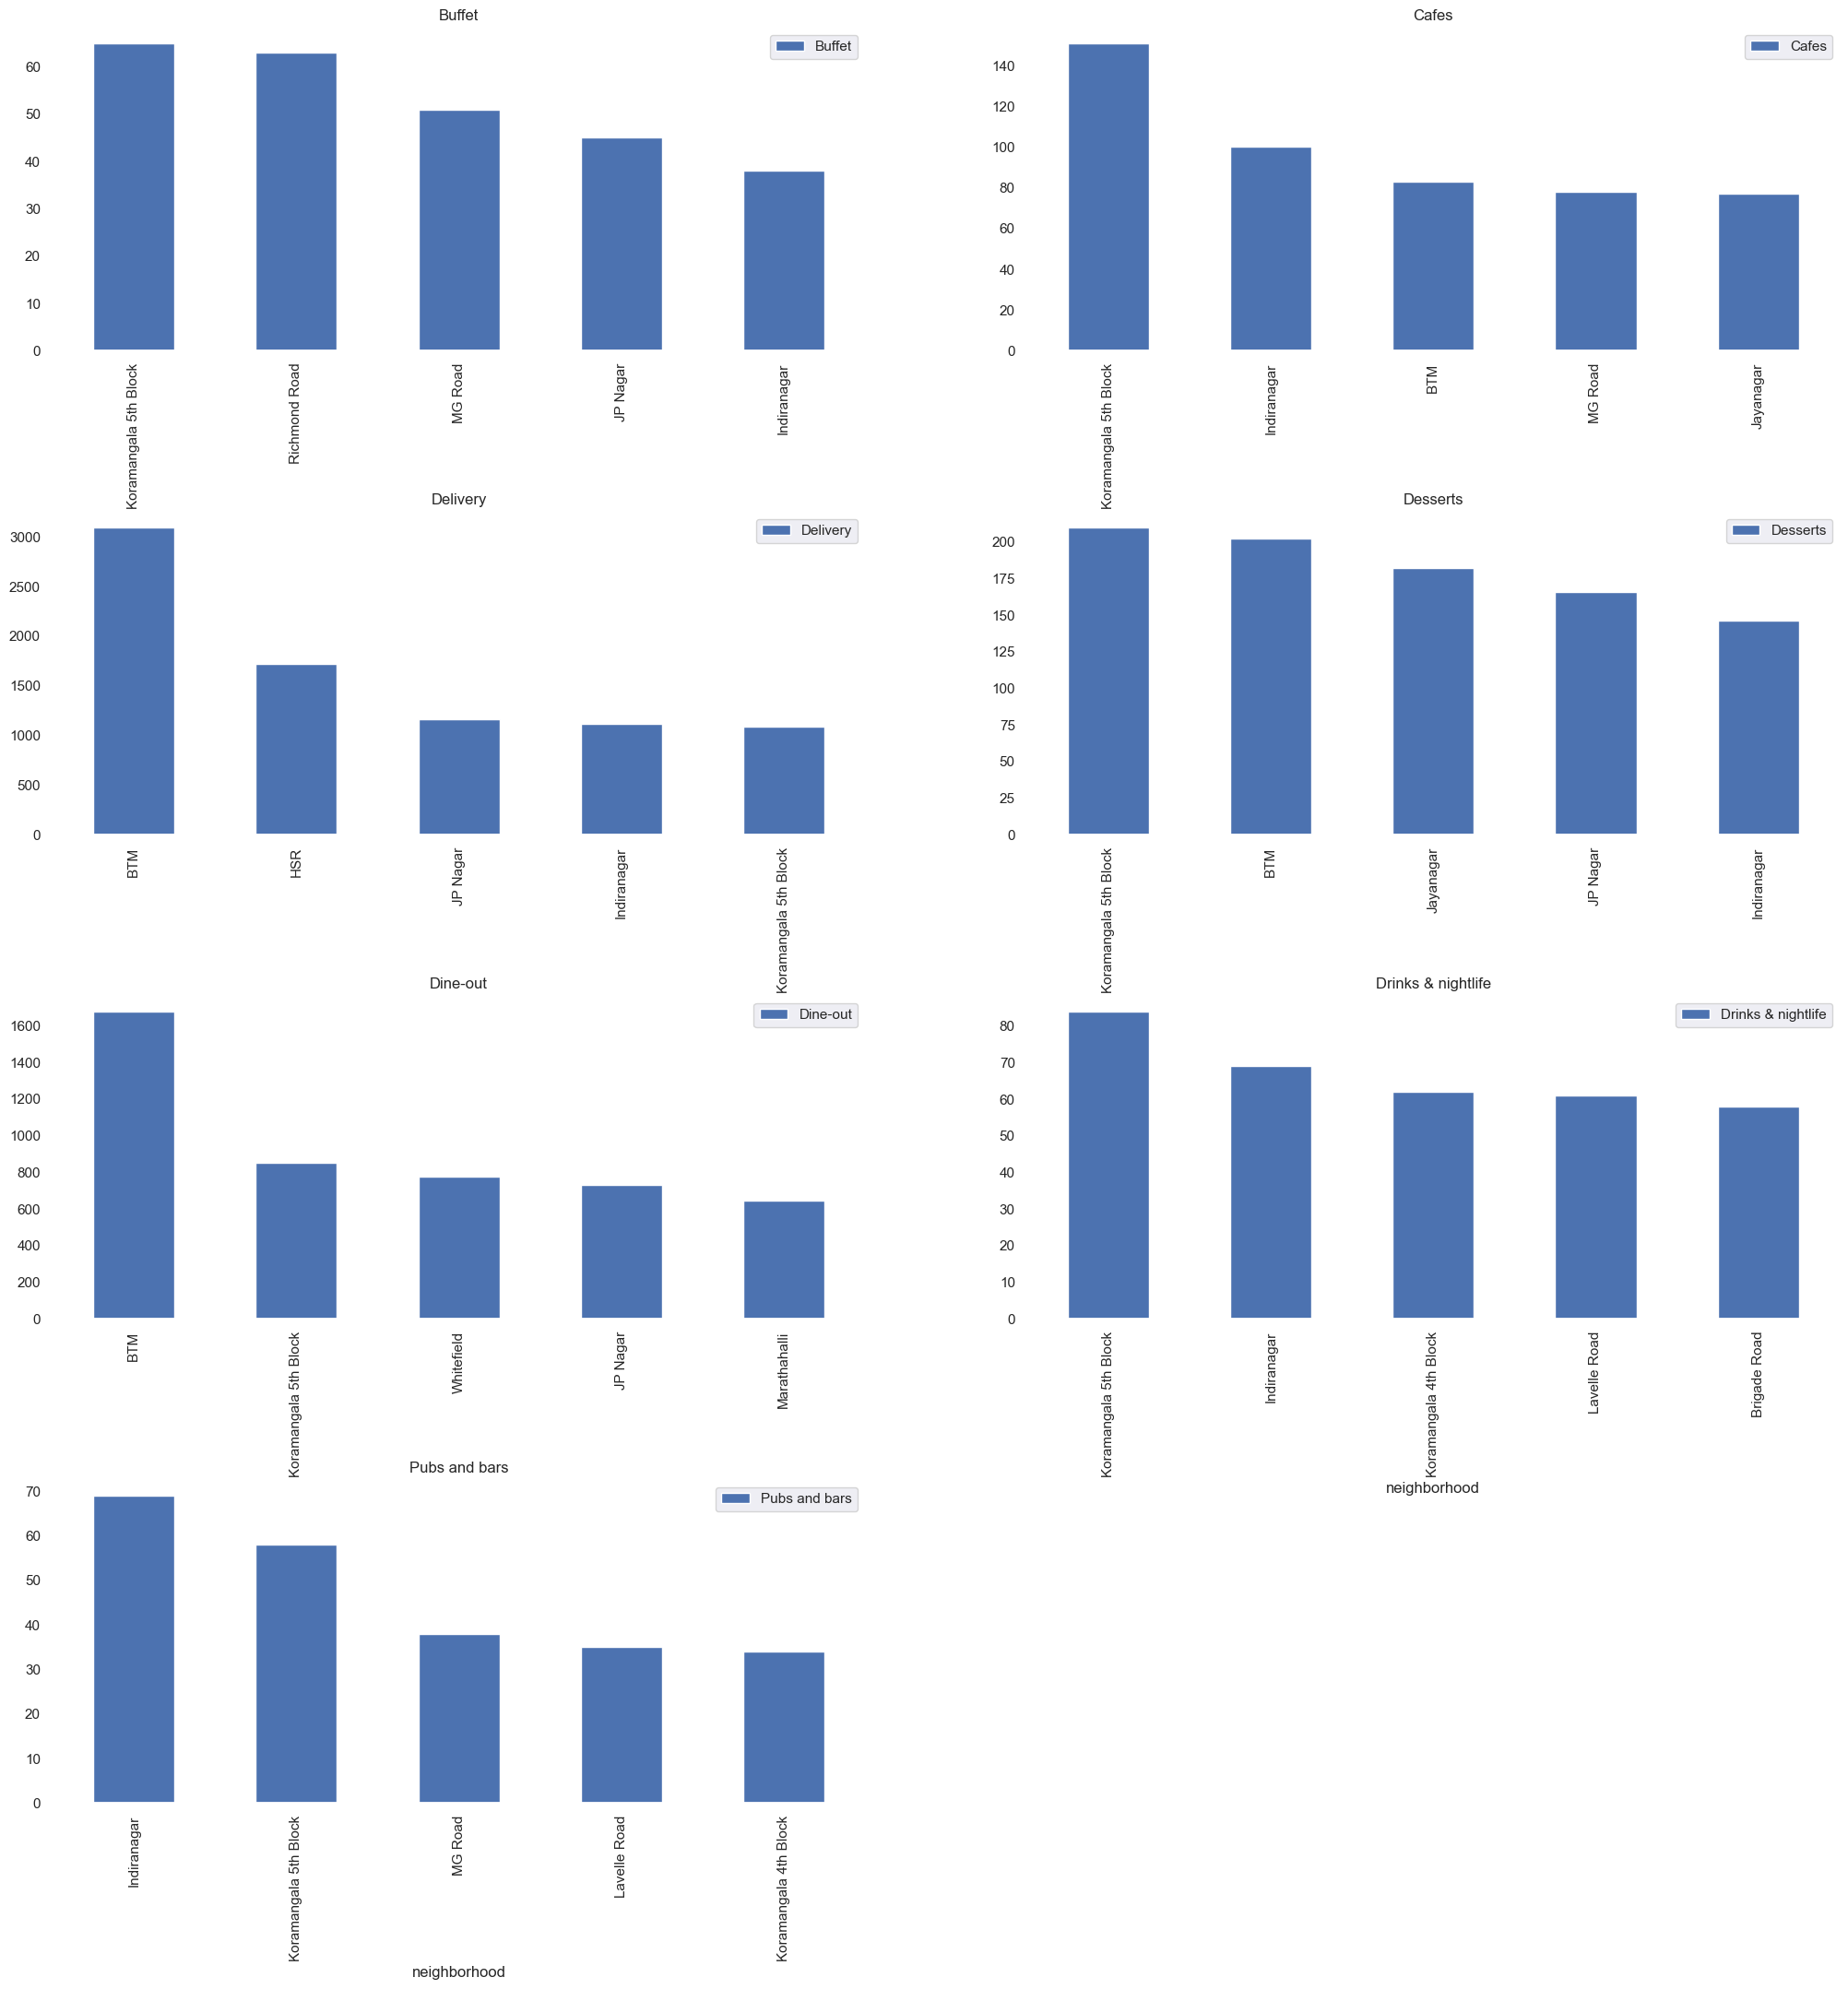

In [ ]:
category = neighborhood_lst.columns
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (25,25))
fig.delaxes(ax[3,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
ax = ax.flatten()

for i in range(0,len(category)):
    d= neighborhood_lst[[category[i]]].sort_values(by=category[i], ascending=False).head()
    d.plot(ax=ax[i],kind='bar')
    ax[i].set_title(category[i])
    ax[i].set_facecolor("white")
    ax[i].set_xticklabels(d.index, rotation='vertical')
    
plt.show()

In [ ]:
# def fun(x):
#     if(type(x) == list):
#         return (len(x))
#     else:
#         return 0
# data['no_of_cuisine'] = data['cuisines'].str.split(',').apply(fun)

In [ ]:
# cui_df = data[['name', 'location', 'rate', 'cuisines']]
# column_names = list(cuisine)
# # instantiate the dataframe
# cui_df = pd.concat([cui_df, pd.DataFrame(columns=column_names)], axis=1)
# cui_df.loc[:, cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])] = cui_df.loc[:, cui_df.columns.isin(['name', 'location', 'rate', 'cuisines'])].fillna(0)

In [ ]:
# for i in range(0, len(cui_df)):
#     for x in cuisine:
#         if type(cui_df.loc[i, 'cuisines']) == str and x in list(cui_df.loc[i, 'cuisines']):
#             cui_df.loc[i, x] = cui_df.loc[i, x]+1

In [ ]:
# cuisine_grouped = cui_df.groupby('location').sum()